In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
df=pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.drop("customerID",axis=1,inplace=True)

In [7]:
df[pd.to_numeric(df["TotalCharges"],errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df=df[df.TotalCharges!=" "]

In [9]:
df.shape

(7032, 20)

In [10]:
df["TotalCharges"]=pd.to_numeric(df.TotalCharges)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df.TotalCharges.dtypes

dtype('float64')

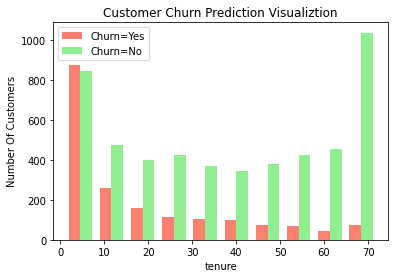

In [12]:
churn_no=df[df.Churn=="No"].tenure
churn_yes=df[df.Churn=="Yes"].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([churn_yes, churn_no], rwidth=0.75, color=['salmon','lightgreen'],label=['Churn=Yes','Churn=No'])
plt.legend();

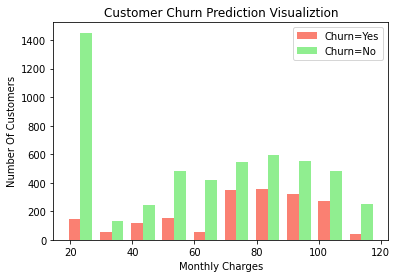

In [13]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.75, color=['salmon','lightgreen'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [14]:
def get_couloms():
    for columns in df:
        if(df[columns].dtypes=="object"):
            print(f"{columns} : {df[columns].unique()}")

In [15]:
  get_couloms()

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
df.replace("No internet service","No",inplace=True)
df.replace("No phone service","No",inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [17]:
get_couloms()

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
##columns with YES or NO
yes_no_col=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
            "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for col in yes_no_col:
    df[col].replace({"Yes":1,"No":0},inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
get_couloms()

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [20]:
df["gender"].replace({"Female":0,"Male":1},inplace=True)

# **ONE HOT ENCODING**

In [21]:
data=pd.get_dummies(data=df,columns=["InternetService","Contract","PaymentMethod"])
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [23]:
data.head(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,0,0,0,0,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6,1,0,0,1,22,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0


# **SCALLING OF DATA** 

In [24]:
from sklearn.preprocessing import MinMaxScaler

col=['tenure','MonthlyCharges','TotalCharges']
scaler=MinMaxScaler()
data[col]=scaler.fit_transform(data[col])

In [25]:
for col in data:
    print(f"{col} : {data[col].unique()}")

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

# **TRAIN TEST SPLIT**

In [26]:
from sklearn.model_selection import train_test_split

x=data.drop("Churn",axis=1)
y=data.Churn

In [27]:
## splitting X
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(5625, 26)

In [28]:
x_test.shape

(1407, 26)

# **Build a model (ANN) in tensorflow/keras**

In [29]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [30]:
model=Sequential([
    Dense(100,input_shape=(26,),activation="relu"),
    keras.layers.Dropout(0.5),
    Dense(50,activation="relu"),
    keras.layers.Dropout(0.3),
    Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",
            loss="binary_crossentropy",
            metrics=["accuracy"])

2022-08-05 10:28:35.489909: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [31]:
model.fit(x_train,y_train,epochs=10)

2022-08-05 10:28:35.712514: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
176/176 [==============================] - 1s 3ms/step - loss: 0.5057 - accuracy: 0.7502
Epoch 2/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.7820
Epoch 3/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.7852
Epoch 4/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4272 - accuracy: 0.7915
Epoch 5/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.7975
Epoch 6/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.7964
Epoch 7/10
176/176 [==============================] - 1s 3ms/step - loss: 0.4246 - accuracy: 0.7975
Epoch 8/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4223 - accuracy: 0.8011
Epoch 9/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8092
Epoch 10/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8068

In [32]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7854


[0.43475237488746643, 0.7853589057922363]

In [33]:
y_p=model.predict(x_test)

y_pred=[]

for i in y_p:
    if i>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [34]:
y_pred[:5]

[0, 0, 1, 0, 0]

In [35]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

# **confusion matrix**

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn

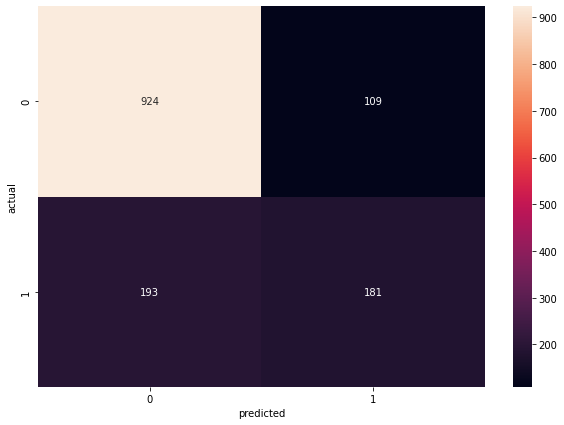

In [37]:
matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(matrix,annot=True,fmt="d")
plt.xlabel("predicted")
plt.ylabel("actual");

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [39]:
def ann(x_train,x_test,y_train,y_test):
    
    model=Sequential([
    Dense(50,input_shape=(26,),activation="relu"),
    Dense(30,activation="relu"),
    Dense(1,activation="sigmoid")])
    
    model.compile(optimizer="adam",
            loss="binary_crossentropy",
            metrics=["accuracy"])
    
    model.fit(x_train,y_train,epochs=100)
    
    y_p=model.predict(x_test)
    
    y_pred=[]

    for i in y_p:
        if i>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    print(classification_report(y_test,y_pred))
    

In [40]:
churn_0_count,churn_1_count=data.Churn.value_counts()
data.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

**UNDER SAMPLING**

In [41]:
churn_0 = data[data["Churn"]==0]
churn_1 = data[data["Churn"]==1]

In [42]:
data_0_under=churn_0.sample(churn_1_count)
undersample_data=pd.concat([data_0_under,churn_1],axis=0)
undersample_data.shape

x=undersample_data.drop("Churn",axis=1)
y=undersample_data["Churn"]

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [44]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [45]:
x_train.shape

(2990, 26)

In [46]:
y_train.shape

(2990,)

In [47]:
ann(x_train,x_test,y_train,y_test)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5734 - accuracy: 0.7137
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7656
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7652
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7696
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.7706
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7676
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7712
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7702
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7732
Epoch 11/

# **OVER SAMPLING WITH SMOTE**

In [48]:
x=data.drop("Churn",axis=1)
y=data["Churn"]

In [49]:
from imblearn.over_sampling import SMOTE

smot=SMOTE()
x_sm,y_sm = smot.fit_resample(x,y)

In [50]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,stratify=y_sm)

In [52]:
ann(x_train,x_test,y_train,y_test)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5030 - accuracy: 0.7608
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7743
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4576 - accuracy: 0.7789
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4502 - accuracy: 0.7835
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.7863
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.7931
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4303 - accuracy: 0.7982
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4258 - accuracy: 0.7975
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4187 - accuracy: 0.8064
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4139 - accura

**f1-score** improved to **0.80 and 0.82**